# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Jed Jerrel K. Escaran\
_Student No._: 2021-07451\
_Section_: HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: 23/11/2023 3:14pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Jed Jerrel K. Escaran

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - 50/50
* Problem 2 - 45/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

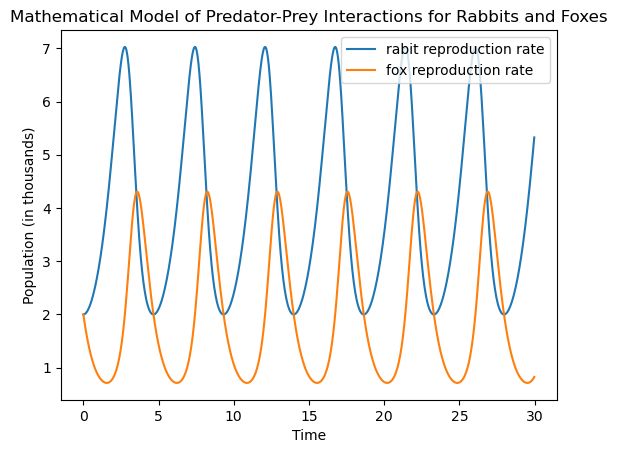

In [11]:
from math import sin
from numpy import arange,array
from pylab import plot, xlabel, ylabel, show, legend, title

def f(r,t):                               # functions
  x=r[0]
  y=r[1]
  fx = alpha*x - beta*x*y                 # fx is dx/dt ; rabbit reproduction rate
  fy = gam*x*y - delta*y                  # fy is dy/dt ; fox reproduction rate
  return array([fx,fy],float)

a = 0.0                                   # from t = 0 to t = 30
b = 30.0
N = 1000                                  # number of steps
h = (b-a)/N                               # step size

alpha = 1.0                               # given conditions
beta = 0.5
gam = 0.5
delta = 2

tpoints = arange(a,b,h)                   # array to store the time points
xpoints = []
ypoints = []
r = array([2.0,2.0],float)                # initial condition for x and y

for t in tpoints:                         # fourth order Runge-Kutta method
  xpoints.append(r[0])                    # append the current x and y values to the respective lists
  ypoints.append(r[1])
  k1 = h*f(r,t)                           # calculate the four intermediate steps (k1, k2, k3, k4) using the Runge-Kutta method
  k2 = h*f(r+0.5*k1, t+0.5*h)
  k3 = h*f(r+0.5*k2, t+0.5*h)
  k4 = h*f(r+k3, t+h)
  r += (k1+2*k2+2*k3+k4)/6                # update the values of x and y using the weighted average of the intermediate steps


plot(tpoints, xpoints, label='rabit reproduction rate')      # plot
plot(tpoints, ypoints, label='fox reproduction rate')
legend(loc='best')
xlabel('Time')
ylabel('Population (in thousands)')
title('Mathematical Model of Predator-Prey Interactions for Rabbits and Foxes')
show()

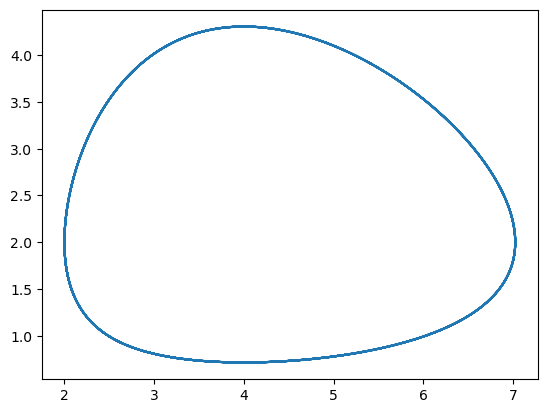

In [12]:
plot(xpoints,ypoints)

As can be seen, the plots are in accordance to a predator-prey relationship. As rabbit reproduction rate increases, the amount of predators also start to increase. As the predator population increases, prey population slowly decrease.When there is too much predator and not enough prey, the fox reproduction rate drops, and the rabbit reproduction rate slowly increase again.

### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


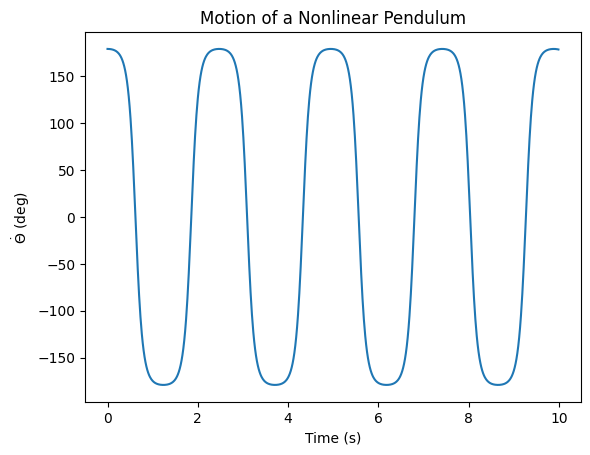

In [67]:
from math import sin, pi
from numpy import arange, array,degrees
from pylab import plot, xlabel, ylabel, show, title, figure

g = 9.81                                                    # gravity
l = 0.1                                                     # 10 cm arm

def f(r,t):                                                 # function defining the first-order differential equations for the pendulum motion
  theta = r[0]                                              # angular displacement
  w = r[1]                                                  # angular velocity
  dtheta = w                                                # first derivative of theta is angular velocity
  dw = -(g/l)*sin(theta)                                    # first derivative of angular velocity
  return array([dtheta,dw],float)

ti = 0.0                                                    # time parameters
tf = 10.0
N = 1000
h = (tf-ti)/N

initial_angle = 179.0/180.0*pi                              # initial conditions (initial angle in radians)
initial_time = 0

tpoints = arange(ti,tf,h)                                   # array to store the time points
thetapoints = []                                            # array to store the angular displacement values
r = array([initial_angle, initial_time], float)             # initial state vector (initial_angle, initial_time)

for t in tpoints:                                           # numerical integration using the fourth-order Runge-Kutta method
  thetapoints.append(r[0])                                  # append the current angular displacement to the list
  k1 = h*f(r,t)
  k2 = h*f(r+0.5*k1, t+0.5*h)
  k3 = h*f(r+0.5*k2, t+0.5*h)
  k4 = h*f(r+k3, t+h)
  r += (k1+2*k2+2*k3+k4)/6                                  # update r

plot(tpoints, degrees(thetapoints))                         # plot
title('Motion of a Nonlinear Pendulum')
xlabel('Time (s)')
ylabel(r"$\dot{\Theta}$ (deg)")
show()

The plot shows the evolution of the angular displacement of the nonlinear pendulum over time. The shape of the plot reflects the complex, nonlinear dynamics of the pendulum. Changes in angular displacement are influenced by the interplay of gravity and the pendulum's length.

<span style="color:blue"> Very vague and non-commital discussion. </span>